In [1]:
# Import library functions
import tex2net
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Sample narrative text
text = """
Winston dislikes Big Brother.
Winston works for O'Brien.
O'Brien deceives Winston.
Winston loves Julia.
Julia loves Winston.
Julia opposes the Party secretly.
Winston writes in a diary.
Parsons asks Winston for help with tasks.
Charrington sells Winston a diary.
Charrington arrests Winston. 
Charrington arrests Julia.
The Thought Police capture Winston.
O'Brien tortures Winston.
Winston betrays Julia under torture.
”"""

# ------------------------------
# Step 1: Text Rewriting & Summarization
# ------------------------------

# Summarize text using T5-small
summary_text = tex2net.summarize_t5(text)
print("\nSummarized Text (T5-small):")
print(summary_text)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565



Summarized Text (T5-small):
- verb - character form: Winston dislikes Big Brother. Winston works for O'Brien. Julia loves Winston. Julia opposes the Party secretly. Winston writes in a diary. Charrington sells Winston a diary. Charrington arrests Julia. The Thought Police capture Winston. Winston betrays Julia under torture.


In [3]:
# ------------------------------
# Step 2: Create the Character Graph
# ------------------------------

# Use the summary (or rewritten version) to create the graph.
graph, characters, relationships = tex2net.create_character_graph(summary_text)
print("\nExtracted Characters:", characters)
print("Relationships:", relationships)

# Merge nodes with similar names for consistency.
graph = tex2net.join_similar_nodes(graph, characters)




Extracted Characters: ['Winston', "O'Brien", 'Julia', 'Charrington']
Relationships: [['Winston', "O'Brien"], ['Julia', 'Winston'], ['Charrington', 'Winston'], ['Charrington', 'Julia'], ['Winston', 'Julia']]


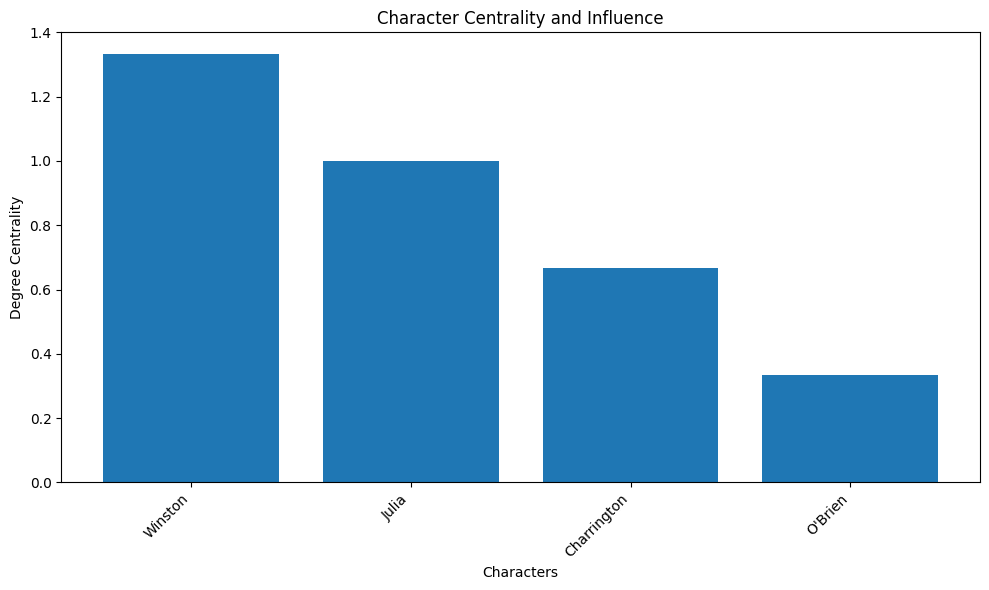

character_network_communities.html


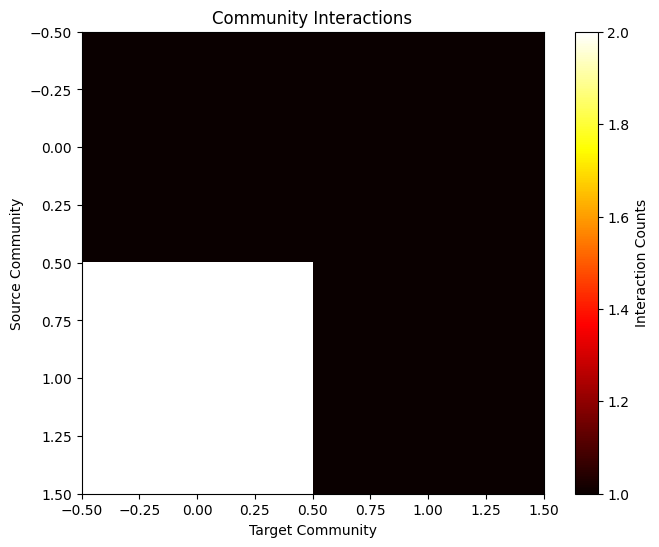

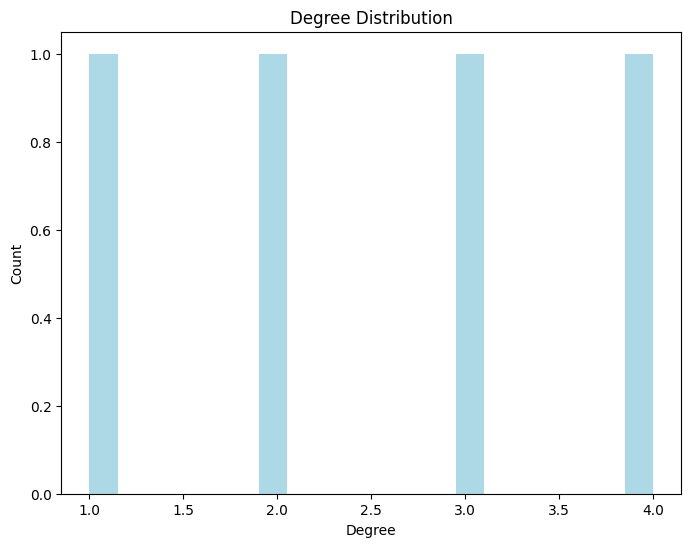

Temporal Relationship Analysis
-----------------------------
Average Temporal Distance: None
Density of Temporal Interactions: 0.4166666666666667
Reciprocity of the Graph: 0.4

Graph Characteristics:
Number of Nodes: 4
Number of Edges: 5
Average Degree: 2.5
Average Clustering Coefficient: 0.425

Detected Communities: {1: ['Winston', "O'Brien"], 0: ['Julia', 'Charrington']}
Degree Centrality: {'Winston': 1.3333333333333333, "O'Brien": 0.3333333333333333, 'Julia': 1.0, 'Charrington': 0.6666666666666666}


In [4]:
# ------------------------------
# Step 3: Network Analysis
# ------------------------------

# 3.1 Plot Character Centralities (Degree Centrality)
tex2net.plot_character_centralities(graph)

# 3.2 Detect Communities and Visualize Them
partition = tex2net.detect_communities_and_plot(graph)

# 3.3 Plot Community Interactions (Heatmap)
tex2net.plot_community_interactions(graph, partition)

# 3.4 Describe Degree Distribution of the Graph
tex2net.describe_degree(graph)

# 3.5 Analyze Temporal Relationships
tex2net.analyze_temporal_relationships(graph)

# 3.6 Print Overall Graph Characteristics
tex2net.analyze_graph_characteristics(graph)

# 3.7 Detect Communities (returning a dictionary)
communities = tex2net.detect_communities(graph)
print("\nDetected Communities:", communities)

# 3.8 Calculate and Print Degree Centrality Values
degree_centrality = tex2net.calculate_degree_centrality(graph)
print("Degree Centrality:", degree_centrality)

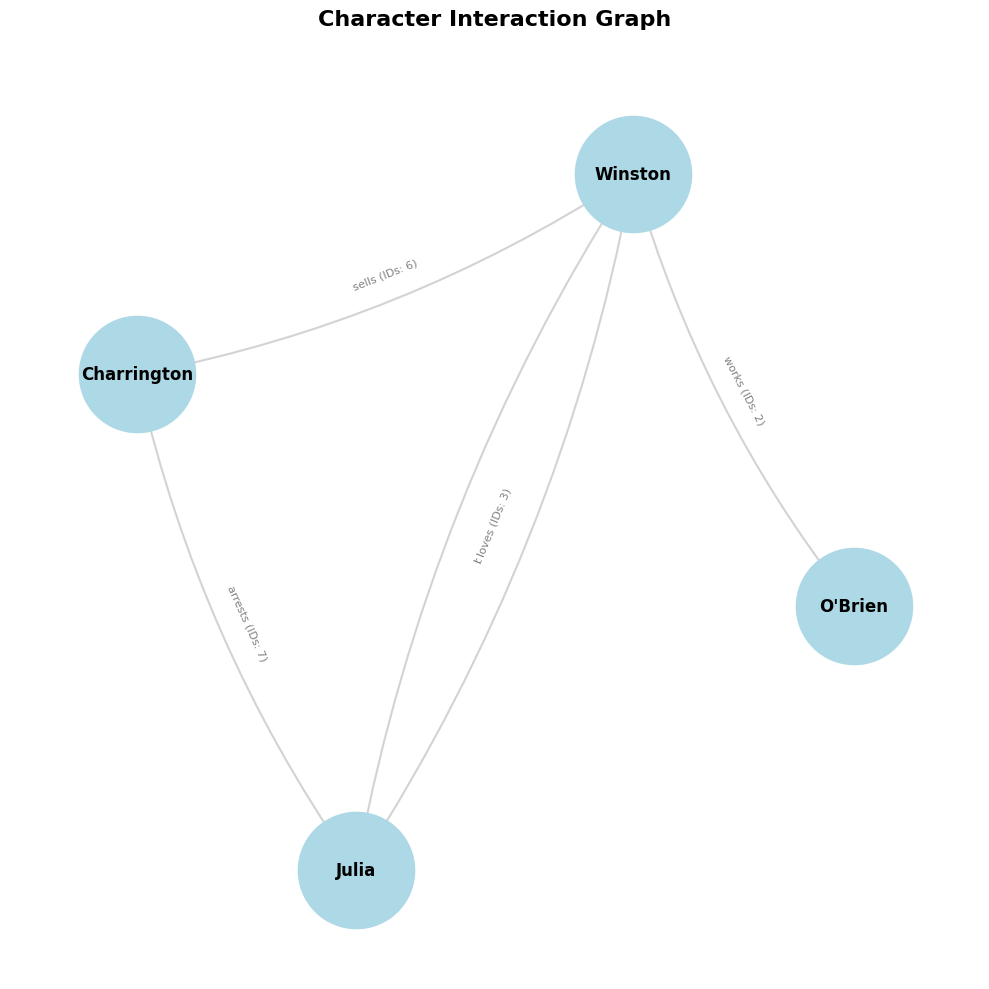

character_relationships.html


In [5]:
# ------------------------------
# Step 4: Visualization
# ------------------------------

# 4.1 Visualize the Graph using Matplotlib (Static Visualization)
tex2net.visualize_graph(graph, title="Character Interaction Graph")

# 4.2 Visualize the Graph using Pyvis (Interactive HTML Visualization)
tex2net.visualize_pyvis_graph(graph, output_file="character_relationships.html")



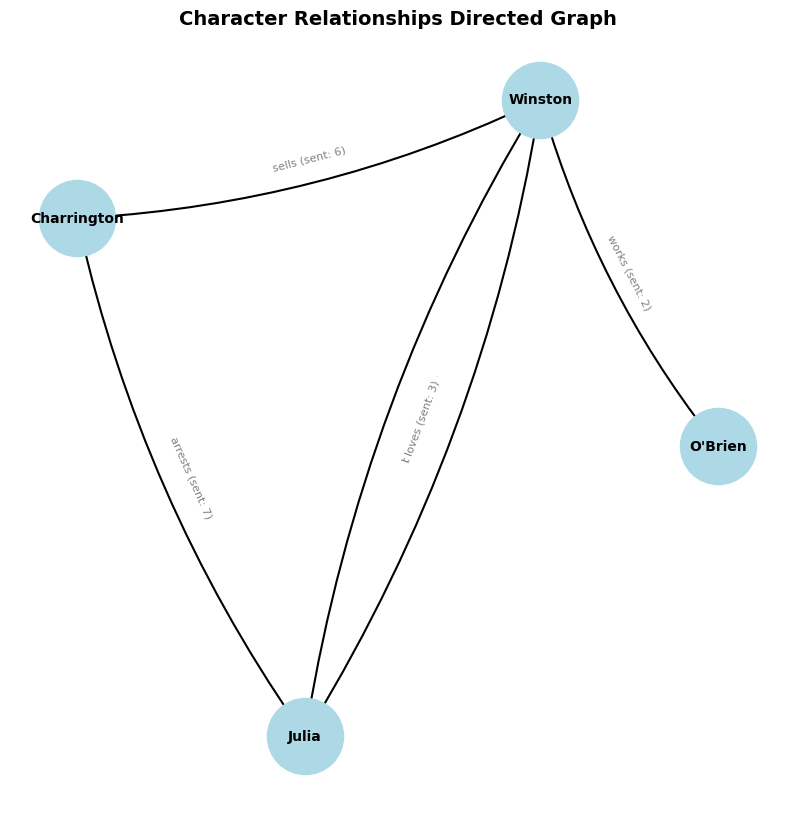

In [6]:
# 4.3 New: Directed Graph Visualization using our new function
tex2net.visualize_directed_graph(graph, title="Character Relationships Directed Graph")

In [7]:
# ------------------------------
# Optional: Further Custom Analysis
# ------------------------------

# Example: Compute and print additional NetworkX metrics
print("\nAdditional NetworkX Metrics:")
print("Average Clustering Coefficient:", nx.average_clustering(graph))
print("Graph Density:", nx.density(graph))


Additional NetworkX Metrics:
Average Clustering Coefficient: 0.425
Graph Density: 0.4166666666666667


Characters discovered: ['Dan', 'Alice', 'Charlie', 'Eve', 'Frank', 'Bob']
Relationships: [['Bob', 'Alice'], ['Bob', 'Alice', 'Charlie'], ['Dan', 'Charlie'], ['Eve', 'Bob', 'Alice'], ['Frank', 'Charlie']]


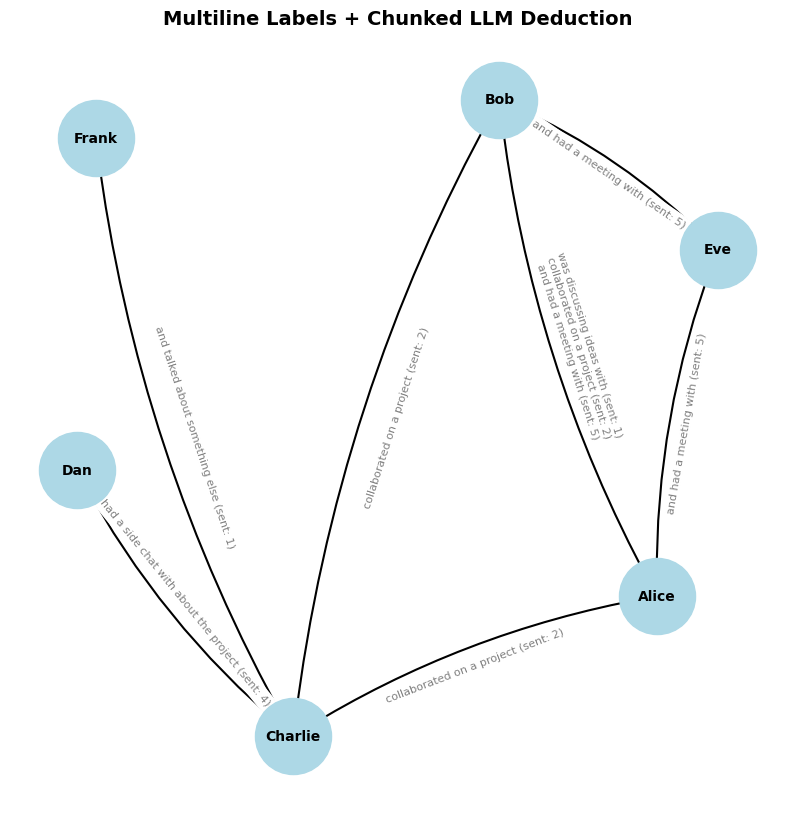

Alice and Bob co-occur in 3 distinct sentences.


In [2]:
text_data = """
    Alice was discussing ideas with Bob. Later, Bob met Charlie and they collaborated on a project.
    Alice was also involved in the conversation. Then, Charlie had a side chat with Dan about the project.
    Finally, Alice and Bob had a meeting with Eve. Meanwhile, Frank and Charlie talked about something else.
    """
# Create a graph by processing 3 sentences at a time (chunk_size=3)
graph, characters, relationships = tex2net.create_character_graph_llm_chunked(text_data) #create_character_graph_llm_chunked

print("Characters discovered:", characters)
print("Relationships:", relationships)

# Visualize
tex2net.visualize_directed_graph(graph, title="Multiline Labels + Chunked LLM Deduction")

# Example usage of the co-occurrence counting function
ccount = tex2net.count_cooccurrences(graph, "Alice", "Bob")
print(f"Alice and Bob co-occur in {ccount} distinct sentences.")

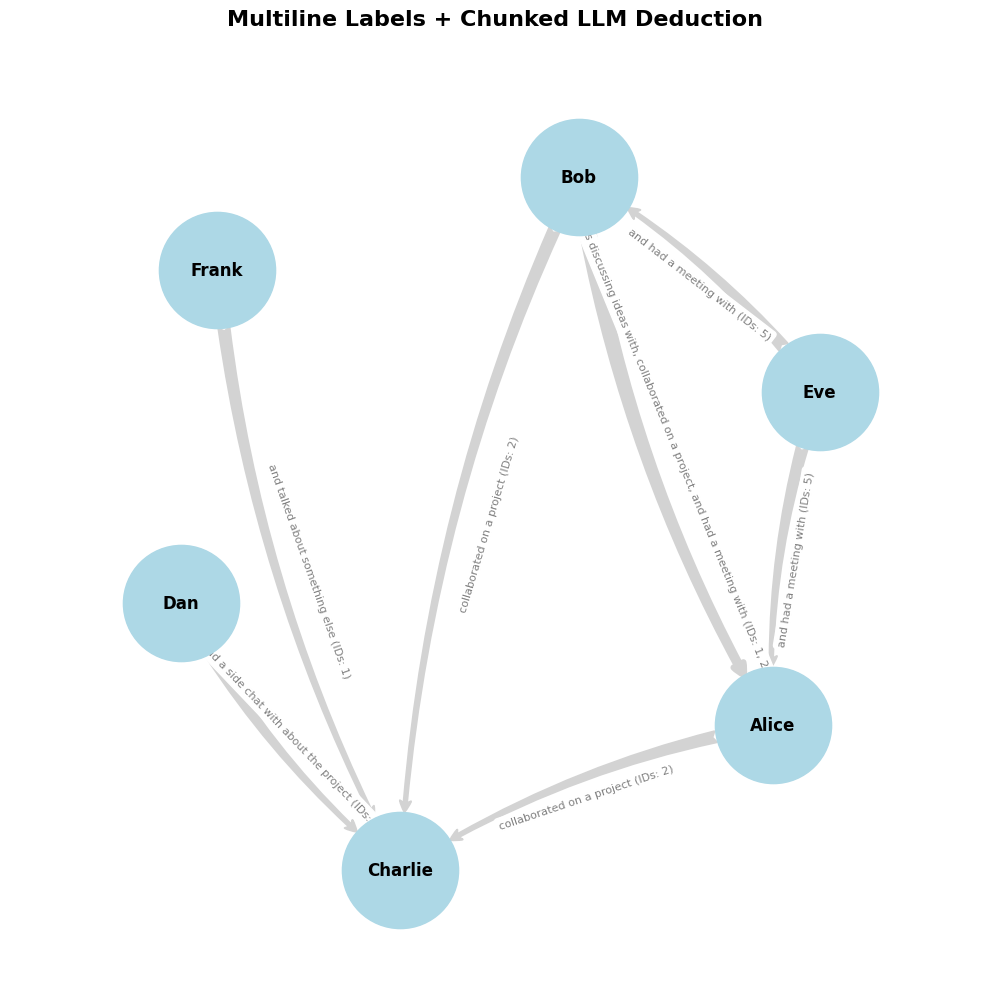

In [3]:
tex2net.visualize_directed_graph_styled(graph, title="Multiline Labels + Chunked LLM Deduction")